# Neural Network with 1 Hidden Layer for Classification

We implement a neural network with a single hidden layer (having `h` units/neurons) to classify a multi-class labeled dataset.

**Loss Calculation**

For the $i$-th sample:

$$l_i = - \sum_{j=1}^n y_{ij} \log{p_{ij}}$$

if we use one-hot encoded `y_true` then the sum is simply picking out the log-prob of the true class.

Total loss is defined as:

$$\mathcal{L} = \frac{1}{m}\sum_{i=1}^m l_i$$

**$dW2$, $db2$ calculation**

$$dZ2 = \frac{dJ}{dA_2}\times\frac{dA_2}{dZ_2} = A_2 - y$$

$$dW2 = \frac{dJ}{dA_2}\times\frac{dA_2}{dZ_2}\times\frac{dZ_2}{dW_2}=(A_2 - y)\times A_1$$
$$db2 = \frac{dJ}{dA_2}\times\frac{dA_2}{dZ_2}\times\frac{dZ_2}{db_2}= A_2 - y $$

Similarly, **$dW1$, $db1$ calculation**

$$dW1 = \frac{dJ}{dA_2}\times\frac{dA_2}{dZ_2}\times\frac{dZ_2}{dA_1}\times\frac{dA_1}{dZ_1}\times\frac{dZ_1}{dW_1}$$
$$db1 = \frac{dJ}{dA_2}\times\frac{dA_2}{dZ_2}\times\frac{dZ_2}{dA_1}\times\frac{dA_1}{dZ_1}\times\frac{dZ_1}{db_1}$$

here $\frac{dA_1}{dZ_1}$ is step function with value 1 if $z>0$ else 0.

$$dW1 = \frac{dJ}{dZ1}\times\frac{dZ_1}{dW_1} = dZ1\times X $$
$$db1 = \frac{dJ}{dZ1}\times\frac{dZ_1}{db_1} = dZ1 $$

---

Here's the actual code:

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('data.csv')

X = df.drop('y', axis=1).values
y = df['y'].values

m = X.shape[0]  # no of training samples = 300
d = X.shape[1]  # no of input features = 2
n = len(np.unique(y))  # no of output neurons = 3
h = 4  # no of units in hidden layer
learning_rate = 0.1

rng = np.random.default_rng(13)

max_iter = 5000
verbose = False
losses = []
accuracies = []


def softmax(x):
    x = x - np.max(x, axis=1, keepdims=True)  # for numerical stability
    t = np.exp(x)
    return t/np.sum(t, axis=1, keepdims=True)


# random initialization
W1 = rng.normal(size=(d, h))
b1 = np.zeros(shape=(1, h))
W2 = rng.normal(size=(h, n))
b2 = np.zeros(shape=(1, n))

for iter in range(max_iter):
    # forward prop
    Z1 = X@W1 + b1
    A1 = np.maximum(0, Z1)  # relu
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    y_preds = np.argmax(A2, axis=1)
    acc = np.mean(y_preds == y)
    accuracies.append(acc)

    preds = np.clip(A2, 1e-15, 1)  # for numerical stability

    # loss calculation
    loss = -np.mean(np.log(preds[np.arange(len(y)), y]))
    losses.append(loss)
    if iter % 100 == 0 and verbose:
        print(f'{iter=}, {loss=}')

    # back prop
    dZ2 = A2.copy()
    dZ2[np.arange(m), y] -= 1  # doing A2-y
    dZ2 /= m  # this is (A2-y)/m which is actual dZ2
    dW2 = A1.T@dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)  # dA1 = dZ2 x (dZ2/dA1) = dZ2 x W2
    # dZ1 = dA1 * (Z1>0)
    # or more clearly:
    dA1[Z1 <= 0] = 0  # setting derivatives to zero when Z1<0
    dZ1 = dA1  # dZ1 = (dJ/dZ1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # updating the weights and biases
    W1 -= learning_rate*dW1
    W2 -= learning_rate*dW2
    b1 -= learning_rate*db1
    b2 -= learning_rate*db2

print(
    f'After {max_iter} iterations, we have loss {losses[-1]:0.4f} and accuracy {accuracies[-1]:0.4f}')

After 5000 iterations, we have loss 0.2649 and accuracy 0.9067


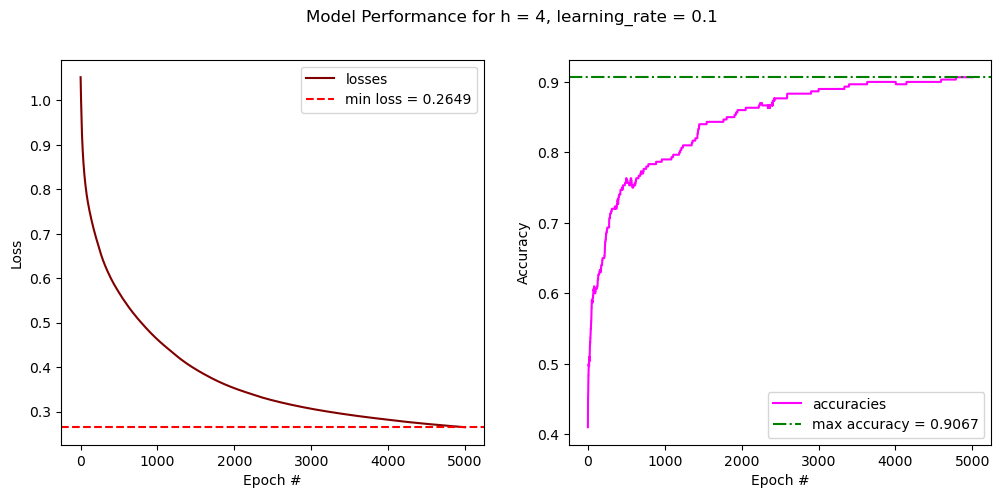

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

min_loss = np.min(losses)
max_acc = np.max(accuracies)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle(f'Model Performance for {h=}, {learning_rate=}')

sns.lineplot(x=range(max_iter), y=losses,
             label='losses', ax=axs[0], color='maroon')
axs[0].axhline(np.min(losses), color='r', linestyle='--',
               label=f'min loss = {min_loss:.4f}')
axs[0].set_xlabel('Epoch #')
axs[0].set_ylabel('Loss')
axs[0].legend()

sns.lineplot(x=range(max_iter), y=accuracies,
             label='accuracies', ax=axs[1], color='magenta')
axs[1].axhline(np.max(accuracies), color='g', linestyle='-.',
               label=f'max accuracy = {max_acc:.4f}')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epoch #')
axs[1].legend()
plt.show()